# Final Project Submission: Real Estate Linear Regression Model Analysis
__(Phase 2)__

* Student Name: Tenicka Norwood
* Program Pace: self paced
* Scheduled Project Review Time: 
* Instructor name: Joe Comeaux
* Blog post Url:https://medium.com/@tenicka.norwood/working-with-data-while-trying-to-stay-dry-fa4ebf5e5f64



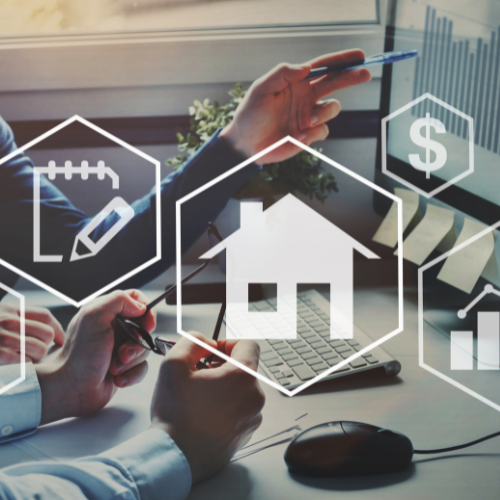
Photo by: anyaberkut on [Canva](https://www.canva.com)


# Business Understanding

LandingPad Realtors is a real estate business that helps families with school-aged children relocate to King County and find the perfect home to meet their families needs. LandingPad provides potential homeowners with home purchase options within their ideal 
budget. 

* __Stakeholder__: LandingPad Realtors
* __Busines Case__: I have been hired by LandingPad to accurately predict the housing prices within the King County Housing Market. Executives at LandingPad want to launch a multimedia campaign to reach their target audience of young families moving to the Kings County Area and want a reliable model that can be refined over time as more information becomes available. 

Primarily, I will start by identifying the characteristics of homes that increase housing costs. The effect of each relevant attribute will then be identified and communicated to the team at LandingPad. Then, I will use this to build a linear regression model that I can use to answer the following guiding questions: 

* Which neighborhoods have the highest average home price?
* How does the number of bedrooms affect the sale price of a home?
* How does proximity to a highly rated school affect the sale price of a home?

The recommendations garnered by answering these questions will be valuable to LandingPad Realtors because they will help prospective home buyers confidently determine which homes yield the best options within their price range.

# Data Understanding

In this project I will use the CRISP DM method. 
The dataset selected in this project are from the :

* King County House Sales Dataset found in <code>kc_house_data.csv</code>

The dataset can be found in the data folder of this repository along with a file called <code>column_names.md</code> which provides description of the features within the dataset. More information about the features on the site of [the King County Assessor.](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

The King County House Sales Dataset includes sales data for 21,597 homes with 25 features including but not limited to:
* <code>id</code> - Unique identifier for a house
* <code>date</code> - Date house was sold
* <code>price</code> - Sale price (prediction target)
* <code>bedrooms</code> - Number of bedrooms
* <code>bathrooms</code> - Number of bathrooms
* <code>sqft_living</code> - Square footage of living space in the home
* <code>sqft_lot</code> - Square footage of the lot
* <code>floors</code> - Number of floors(levels) in house
* <code>waterfront</code> - Whether the house is on a waterfront
* <code>view</code>  - Quality of view from house
* <code>condition</code> How good the overall condition of the house is. Related to the maintenance of house. 
* <code>grade</code> -Overall grade of the house. Related to the construction adn design of the house
* <code>yr_built</code> - Year when house was built
* <code>yr_renovated</code> - Year when house was renovated
* <code>lat</code> - Latitude coordinate
* <code>long</code> - Longitude coordinate

## Data Preparation

## Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement. The main libraries that will be used within this project include:

* <code>pandas</code>: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
* <code>numpy</code>: a key library that brings the computationaly power of languages like C to Python
* <code>matplotlib</code>: a comprehensive visualization library
* <code>seaborn</code>: a data visualization library based on matplotlib

In [1]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Used for working with the z-score 
from scipy import stats

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Read in data from  <code>kc_house_data.csv</code> using <code>.read_csv()</code> from the pandas library.

In [2]:
# Read in the data
# Read Data from Kings County House Data
df = pd.read_csv('data/kc_house_data.csv', index_col = 0)

Let's look at the first five rows of the Kings County Housing Data.

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [5]:
# Check for placeholders throughout the entire dataframe
df.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
# Convert sqft_basement to float
# Replace placeholder ? to NAN values
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors="coerce")

In [7]:
# Check for placeholders throughout the entire dataframe
df.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Let's look at the columns within the <code>pandas</code> dataframe.

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

This dataset has 20 columns with 21597 rows of data. The waterfront, view, condition, grade, sqft_basement and date are object datatypes. 

Let's check which columns contain null values.

In [9]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Let's convert the date from a string to a datetime object. 

In [10]:
# Convert data column in the dataframe to datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipco

In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503


From our check, the waterfront column has 2376 null values. The view column has 63 null values and the yr_renovated column has 3842 null values. 

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21143.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,291.85,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,442.50,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [14]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
#for col in categoricals:
#    print(df[col].value_counts(), "\n")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipco

Next I will impute missing values in the dataframe. I replaced <code>waterfront</code>,<code>sqft_basement</code> and <code>view</code> null values with 0 and replace <code>yr_renovated</code> null values with the <code>yr_built</code>.

In [17]:
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [18]:
df["waterfront"].fillna(0, inplace = True)
df["sqft_basement"].fillna(0, inplace = True)
df["view"].fillna(0, inplace = True)
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [19]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].nunique()))

date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 3
view : 6
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 303
yr_built : 116
yr_renovated : 117
zipcode : 70
lat : 5033
long : 751
sqft_living15 : 777
sqft_lot15 : 8682


In [20]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

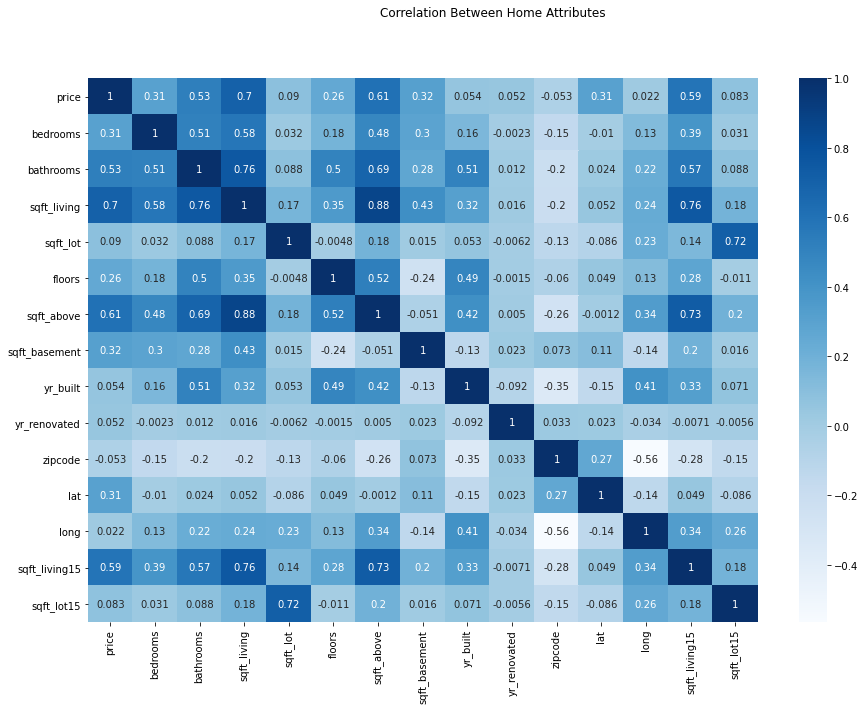

In [21]:
# Review correlations on filtered dataset
plt.figure(figsize = (15,10)).suptitle("Correlation Between Home Attributes")
sns.heatmap(df.corr(), annot = True, cmap = "Blues");

Visualize target using <code>seaborn</code>.

C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


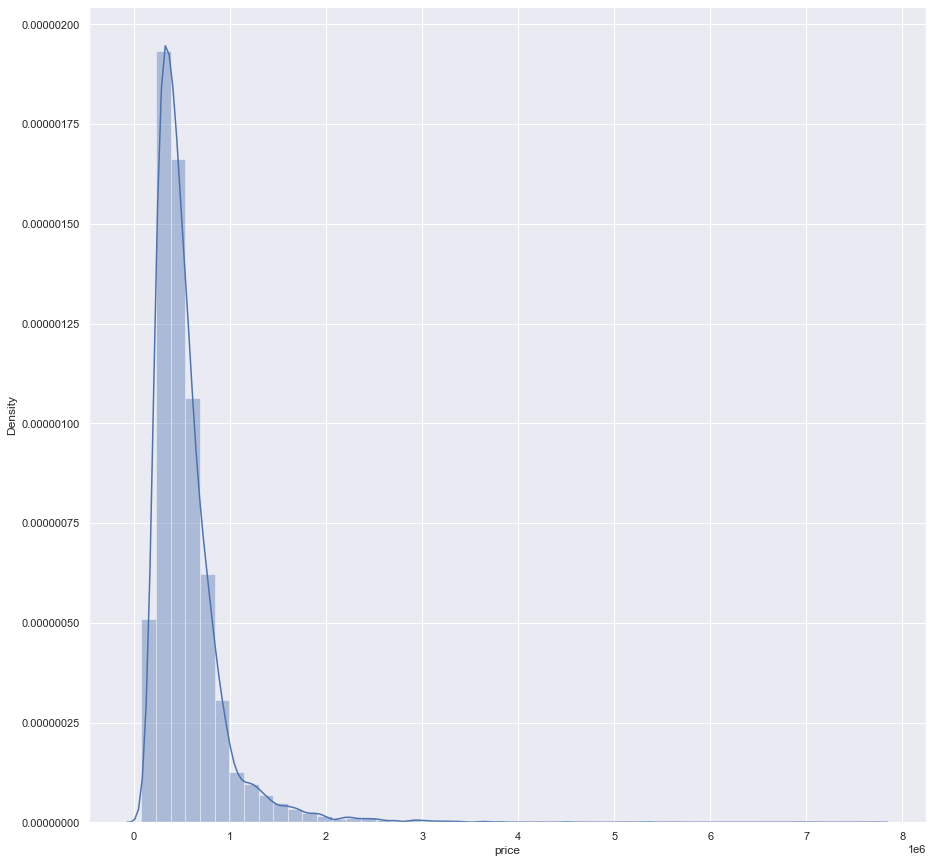

In [22]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['price'])
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

# Identifying a Highly Correlated Predictor

In [23]:
df.corr()['price'].sort_values()

zipcode         -0.05
long             0.02
yr_renovated     0.05
yr_built         0.05
sqft_lot15       0.08
sqft_lot         0.09
floors           0.26
lat              0.31
bedrooms         0.31
sqft_basement    0.32
bathrooms        0.53
sqft_living15    0.59
sqft_above       0.61
sqft_living      0.70
price            1.00
Name: price, dtype: float64

In [24]:
colin_df = abs(df.corr()) > 0.70
colin_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [25]:
revised_df = df.drop(['sqft_above', 'date', 'sqft_living15', 'sqft_lot15'], axis=1)

In [26]:
revised_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,,,,,,,,,,,,,,,,
7129300520,221900.00,3,1.00,1180,5650,1.00,0,NONE,Average,7 Average,0.00,1955,0.00,98178,47.51,-122.26
6414100192,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,400.00,1951,1991.00,98125,47.72,-122.32
5631500400,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,0.00,1933,1933.00,98028,47.74,-122.23
2487200875,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,910.00,1965,0.00,98136,47.52,-122.39
1954400510,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,0.00,1987,0.00,98074,47.62,-122.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.00,3,2.50,1530,1131,3.00,NO,NONE,Average,8 Good,0.00,2009,0.00,98103,47.70,-122.35
6600060120,400000.00,4,2.50,2310,5813,2.00,NO,NONE,Average,8 Good,0.00,2014,0.00,98146,47.51,-122.36
1523300141,402101.00,2,0.75,1020,1350,2.00,NO,NONE,Average,7 Average,0.00,2009,0.00,98144,47.59,-122.30


In [27]:
revised_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [28]:
revised_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [29]:
revised_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 2.8+ MB


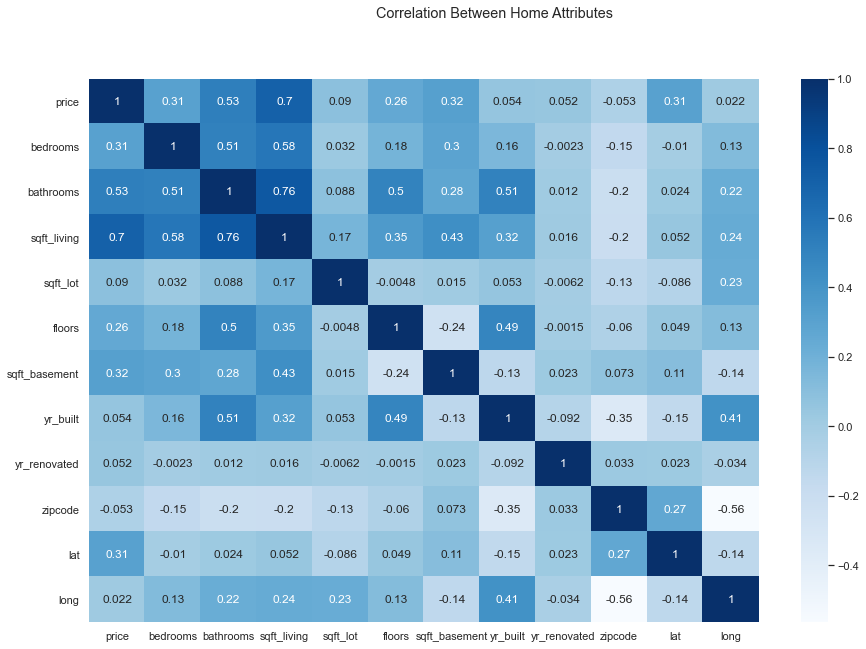

In [30]:
# Review correlations on filtered dataset

plt.figure(figsize = (15,10)).suptitle("Correlation Between Home Attributes")
sns.heatmap(revised_df.corr(), annot = True, cmap = "Blues");

## Place categorical and continuous data into separate dataframes.

In [63]:
# Create a list of all the categorical features
categoricals = ['floors', 'view', 'condition', 'grade']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
df_with_dummies = pd.get_dummies(data=df, columns=categoricals, drop_first=True)

In [64]:
# Check that the changes have taken place
df_with_dummies.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00,3,1.00,1180,5650,0,1180,0.00,1955,...,0,0,0,0,0,0,0,1,0,0
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,NO,2170,400.00,1951,...,0,0,0,0,0,0,0,1,0,0
5631500400,2015-02-25,180000.00,2,1.00,770,10000,NO,770,0.00,1933,...,0,0,0,0,0,0,1,0,0,0
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,NO,1050,910.00,1965,...,0,0,0,0,0,0,0,1,0,0
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,NO,1680,0.00,1987,...,0,0,0,0,0,0,0,0,1,0


In [31]:
#categoricals = revised_df[['waterfront','view', 'condition', 'grade', 'zipcode']]
#categoricals.head()

In [32]:
#revised_df.corr()['price'].sort_values()

In [33]:
#continuous = revised_df[['floors', 'lat', 'bedrooms', 'sqft_basement','bathrooms','sqft_living', 'price']]
#continuous

In [34]:
#plt.figure(figsize=(15,10))
#sns.boxplot(x=continuous['bedrooms'], y=continuous['price'], data=continuous)

In [35]:
#plt.figure(figsize=(15,10))
#sns.boxplot(x=continuous['bathrooms'], y=continuous['price'], data=continuous)

In [36]:
#plt.figure(figsize=(15,10))
#sns.boxplot(x=continuous['floors'], y=continuous['price'], data=continuous)

In [37]:
#continuous_zscore = np.abs(stats.zscore(continuous))

In [38]:
#continuous_data = continuous[(continuous_zscore < 2).all(axis=1)]
#continuous_data.head()

In [39]:
#fig = plt.figure(figsize = (20,15))
#ax = fig.gca()
#continuous_data.hist(ax = ax);

In [40]:
#Let's make a continuous data feature and a feature for our target variable
#target = continuous_data['price']
#continuous_features = continuous_data.drop('price', axis=1)

In [41]:
#import statsmodels.api as sm
#model_1 = sm.OLS(target, sm.add_constant(continuous_features))

In [42]:
#model_1_results = model_1.fit()

In [43]:
#print(model_1_results.summary())

In [44]:
#Let's create our dummy variables
#conditional_dummies = pd.get_dummies(categoricals['condition'], prefix='cond', drop_first=True)
#grade_dummies = pd.get_dummies(categoricals['grade'], prefix='grade', drop_first=True)
#zipcode_dummies = pd.get_dummies(categoricals['zipcode'], prefix='zc', drop_first=True)

In [45]:
#Let's create one feature containing all of our dummies
#categorical_dummies = pd.concat([conditional_dummies, grade_dummies, zipcode_dummies, categoricals], axis=1)

In [46]:
#categorical_dummies

In [47]:
# Let's combine all of our features into one dataframe and drop any NaN values
#continuous_features.columns

#### most_correlated = 'sqft_living'

In [48]:
#df.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

In [49]:
#y = df['price']
#X_baseline = df[[most_correlated]]

Fit a simple linear regression

In [50]:
#import statsmodels.api as sm

#baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#baseline_results = baseline_model.fit()

In [51]:
#print(baseline_results.summary())

In [52]:
#import matplotlib.pyplot as plt

#categorical_features = df.select_dtypes("object").columns
#fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(25, 25))

#for index, feature in enumerate(categorical_features):
#    df.groupby(feature).mean().plot.bar(
#        y="price", ax=axes[index])

In [53]:
#cat_col = "grade"

In [54]:
#X_iterated = df[[most_correlated, cat_col]]
#X_iterated

In [55]:
# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
# X_iterated = pd.get_dummies(X_iterated, columns = [cat_col])
# X_iterated

In [56]:
# Choose a column to drop
# X_iterated.drop("grade_5 Fair" , axis = 1, inplace = True)
# X_iterated

In [57]:
#iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
#iterated_results = iterated_model.fit()

In [58]:
#print(iterated_results.summary())

In [59]:
#df_subset = pd.DataFrame(df_subset)
#df_subset.info()
#df_subset.isnull()

# Modeling

In [60]:
#import pandas as pd
#from selenium import webdriver

#url = "https://www.greatschools.org/washington/seattle/schools/?gradeLevels%5B%5D=e&gradeLevels%5B%5D=m&gradeLevels%5B%5D=h&st%5B%5D=public_charter&st%5B%5D=public&st%5B%5D=charter&view=table"

#driver = webdriver.Chrome('C:\chromedriver_win32\chromedriver.exe')
#driver.get(url)

#html = driver.page_source

#table = pd.read_html(html)
#school_df = table[0]

#driver.close()

In [61]:
#school_df.columns

In [62]:
#df.info()

# Evaluation

# Deployment

# Insights

# Recommendations